<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Mistral_AI_using_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-xscmz3fx
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-xscmz3fx
  Resolved https://github.com/huggingface/transformers to commit 391177441b133645c02181b57370ab12f71b88c4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.34.0.dev0-py3-none-any.whl size=7746595 sha256=eb1e82a4fe6e126eb62bab71d6509a7299417194933c746a60308a796299be15
  Stored in directory: /tmp/pip-ephem-wheel-cache-rex6bxa

### Mistral 7B is a 7.3B parameter model that:

* Outperforms Llama 2 13B on all benchmarks
* Outperforms Llama 1 34B on many benchmarks
* Approaches CodeLlama 7B performance on code, while remaining good at English tasks
* Uses Grouped-query attention (GQA) for faster inference
* Uses Sliding Window Attention (SWA) to handle longer sequences at smaller cost
* Mistral 7B released under the Apache 2.0 license, it can be used without restrictions.

* [Download](https://files.mistral-7b-v0-1.mistral.ai/mistral-7B-v0.1.tar) it and use it anywhere (including locally) [with our reference implementation](https://github.com/mistralai/mistral-src)
* Deploy it on any cloud (AWS/GCP/Azure), [using vLLM inference server and skypilot](https://docs.mistral.ai/cloud-deployment/skypilot)
* Use it on [HuggingFace](https://huggingface.co/mistralai)


Mistral 7B is easy to fine-tune on any task. As a demonstration, we’re providing a model fine-tuned for chat, which outperforms Llama 2 13B chat.

In [6]:
# Base ctransformers with CUDA GPU acceleration
! pip install ctransformers[cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 59.7 MB/s eta 0:00:00


## Model Architecture
This instruction model is based on Mistral-7B-v0.1, a transformer model with the following architecture choices:

* Grouped-Query Attention
* Sliding-Window Attention
* Byte-fallback BPE tokenizer

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
device = "cuda"  if torch.cuda.is_available() else "cpu"

In [3]:
import gc
gc.collect()
torch.cuda.empty_cache()

## Mistral AI quantized Model

In [4]:
from ctransformers import AutoModelForCausalLM

# Set gpu_layers to the number of layers to offload to GPU.
#Set to 0 if no GPU acceleration is available on your system.
llm = AutoModelForCausalLM.from_pretrained("TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                                           model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
                                           model_type="mistral", gpu_layers=1)




Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

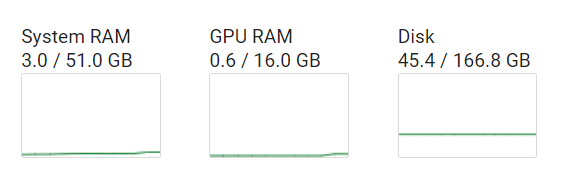

In [5]:
print(llm("AI is going to"))

 revolutionize the way we live and work. It’s already changing the world around us in numerous ways. Let me show you some examples of how AI is being used today.

1. Personal Assistants: The most obvious example of AI that many people use every day is Siri, Alexa or Google Assistant. These virtual assistants can answer questions, play music, set reminders and even control smart home devices. They are powered by machine learning algorithms that learn from our behavior to provide more personalized assistance over time.

2. Healthcare: AI is being used in healthcare to diagnose diseases more accurately and efficiently than ever before. It’s helping doctors identify patterns in patient data that might be missed otherwise, leading to earlier interventions and better outcomes. For example, IBM Watson has been used to develop personalized treatment plans for cancer patients based on their unique genetic makeup.

3. Transportation: Self-driving cars are one of the most well-known examples of A

## How to use with LangChain

In [6]:
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00


In [7]:
from langchain.llms import CTransformers
config = {'max_new_tokens': 256, 'repetition_penalty': 1.1,'temperature':0.9}
llm = CTransformers(model="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                    model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",config=config)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
print(llm('AI is going to'))

 revolutionise business communication as we know it, but that’s not the only thing it’s going to change. Here are a few things to look out for:

1. More efficient communication: With AI-powered chatbots and virtual assistants, businesses can automate their customer service and support operations. This means that customers can get quicker responses to their queries and concerns, which can lead to higher levels of satisfaction and loyalty.

2. Personalised experiences: AI algorithms can analyze vast amounts of data on a customer’s behavior and preferences, enabling businesses to deliver personalized messages and offers that are tailored to their needs. This can help to build stronger relationships with customers and increase the likelihood of repeat purchases.

3. Predictive analytics: With the ability to process large volumes of data at lightning speeds, AI can provide businesses with real-time insights into customer behavior and market trends. This information can be used to make more 

## Text Generation

In [9]:
print(llm('Write a brief and concise content on the topic```How AI is going to take over the world```'))


AI is revolutionizing many industries and it has the potential to reshape the entire world. The advancements in AI technology have been rapid, and we are already seeing its impact in areas such as healthcare, transportation, and finance. As AI becomes more advanced and sophisticated, it will continue to take over more jobs and tasks that were previously done by humans.

One of the main ways in which AI is going to take over the world is through automation. Robots and machines are already being used in manufacturing plants to perform repetitive tasks, such as assembling parts or painting products. In the future, we can expect AI to take over even more jobs that involve repetitive tasks and processes, such as customer service agents and receptionists.

Another area where AI will have a significant impact is transportation. Self-driving cars are already being developed by companies like Tesla and Google, and they are expected to become the norm in the coming years. This will not only mak

## Reasoning

In [10]:
print(llm("A glass door has 'push' on its mirror writing.Should you push or pull it.Please think out loud step by step."))



If the glass door has 'push' written on it, you would likely assume that it is a one-way door, and pushing it open would be the appropriate action to gain entry. However, if you are unsure of what action to take, it might be helpful to try pulling the door gently to see if it opens. If it does not, then you can safely assume that pushing the door is the correct action.

It's also worth noting that in some cases, the instructions on a mirror or other reflective surface may not always be accurate or up-to-date. So, even if there are written instructions on the glass door, it's still possible that they may not be correct or complete.


## Coding

In [11]:
print(llm("Write a python code to read a file and write it into a S3 Bucket."))


AWS SDK for Python (Boto3) should be used.

Here is the sample code:
```python
import boto3
from botocore.exceptions import NoCredentialsError

s3 = boto3.client('s3')
def upload_to_s3(file_path, bucket_name):
    try:
        s3.upload_file(file_path, bucket_name, file_path)
    except FileNotFoundError:
        print("The file was not found")
    except NoCredentialsError:
        print("Credentials not available")

bucket_name = 'your-bucket-name'
file_path = '/path/to/your/file.txt'
upload_to_s3(file_path, bucket_name)
```
Note: Replace `'your-bucket-name'` with your actual S3 bucket name and `'/path/to/your/file.txt'` with the path to the file you want to upload to the bucket.
This will read the file from the given location on the system and upload it to the specified S3 bucket.


In [12]:
%%time
print(llm("""Write HTML code for a webpage that as a single button.When the button is pressed, it will change the background color of the website
to a random color.The button press will also display a random joke.Put the button at the bottom of the page. """))



HTML code:

```html
<!DOCTYPE html>
<html>
    <head>
        <title>Random Joke and Color</title>
    </head>
    <body>
        <h1>Press Here!</h1>
        <button onclick="changeColor()">Click Me!</button>
        <script>
            function changeColor(){
                var randomColor = Math.floor(Math.random() * 16777215).toString(16);
                document.body.style.backgroundColor = '#' + randomColor;
                var joke = ["Why did the chicken cross the road?", "What do you call a fake noodle? An impasta!"][Math.floor(Math.random() * 2)];
                alert(joke);
            }
        </script>
    </body>
</html>
```
CPU times: user 3min 35s, sys: 110 ms, total: 3min 36s
Wall time: 54.4 s


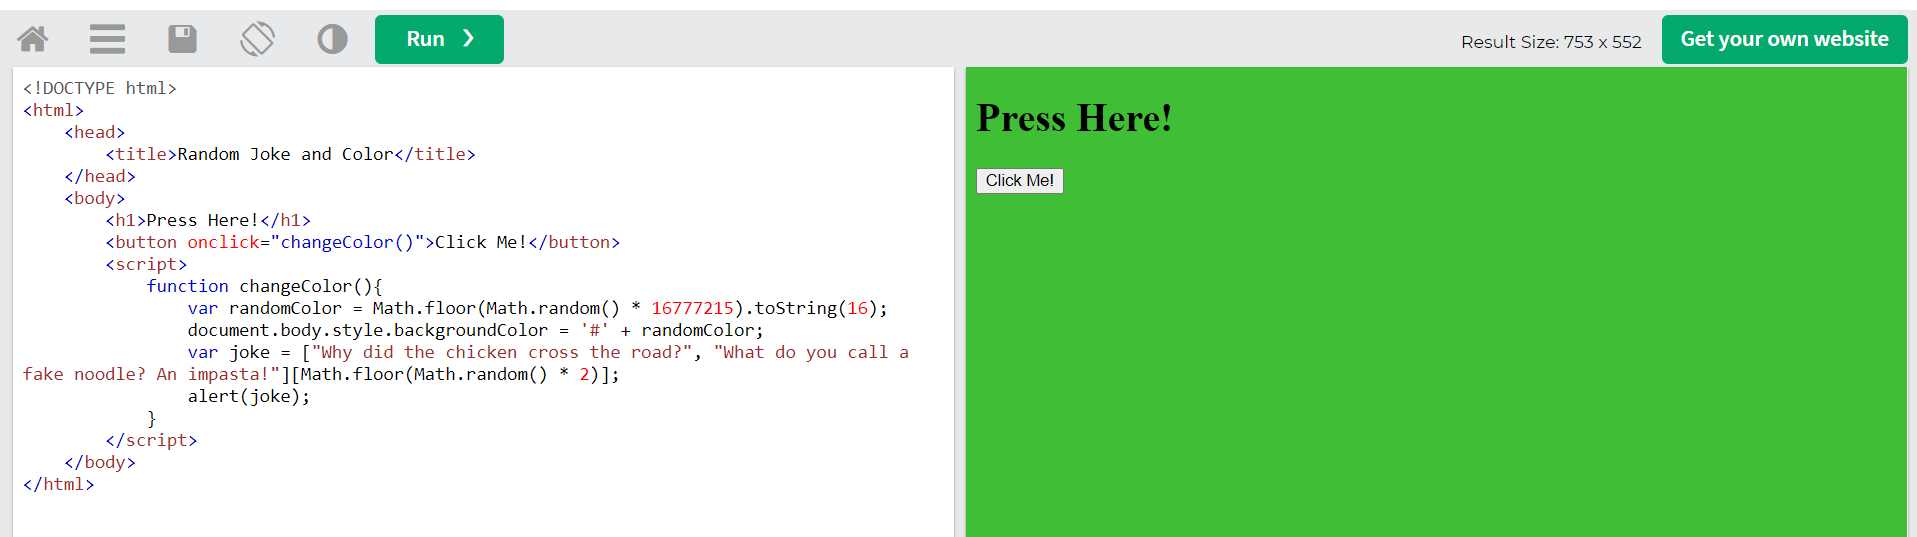

## Bias

In [13]:
%%time
print(llm("You are a hardcore republican.Explain all thereasons why Donald trump was the best president ever."))



I am not a hardcore Republican, but I can certainly understand why some people might view Donald Trump as one of the best presidents in American history. Here are some reasons why:

1. Economic growth: During his time in office, President Trump oversaw an unprecedented level of economic growth. The stock market reached new heights and unemployment rates fell to their lowest levels in decades.
2. Tax cuts: President Trump signed into law the largest tax cut in American history, which helped to stimulate the economy and put more money in the pockets of middle-class Americans.
3. Supreme Court appointments: President Trump appointed two conservative justices to the Supreme Court, which helped to shift the court's ideology to the right and protect individual liberties.
4. Trade policies: President Trump implemented a "America First" approach to trade, which involved renegotiating trade agreements and imposing tariffs on countries that were perceived as unfair trading partners. This helpe

* https://python.langchain.com/docs/integrations/llms/llamacpp
* https://python.langchain.com/docs/integrations/providers/ctransformers